In [1]:
from dataset import AnimalDataset
from train import train
from resnet18 import ResNet18
from loss import CrossEntropyLoss
from optimizer import SGD
import matplotlib.pyplot as plt
import numpy as np
import random

data_dir = "/home/an/an_workplace/Lab_CV/Data/animals" 

dataset = AnimalDataset(data_dir)
print("Tổng số ảnh:", len(dataset))
print("Danh sách lớp:", dataset.classes)


Tổng số ảnh: 26179
Danh sách lớp: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


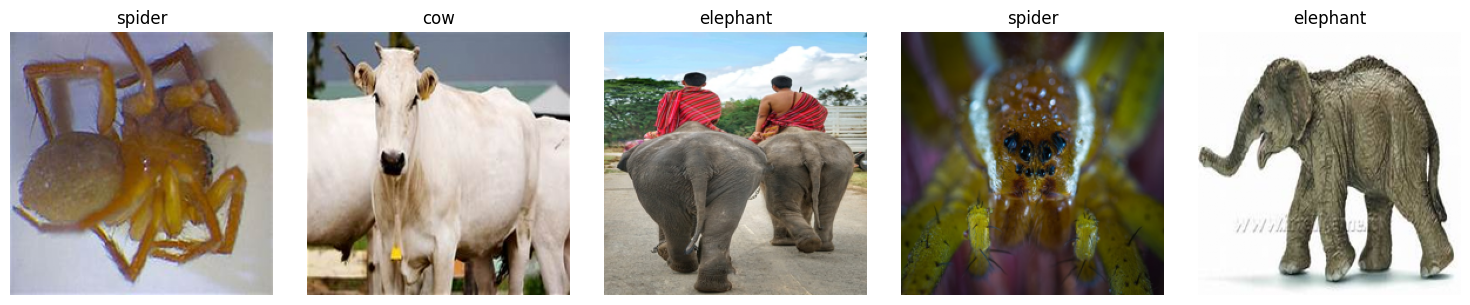

In [2]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    idx = random.randint(0, len(dataset)-1)
    img, label = dataset[idx]
    img = img.transpose(1, 2, 0)  # CHW → HWC để hiển thị
    axs[i].imshow(img)
    axs[i].set_title(dataset.classes[label])
    axs[i].axis('off')

plt.tight_layout()
plt.show()


/tmp/ipykernel_8228/1842735393.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/an/miniconda3/envs/cv_env_py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


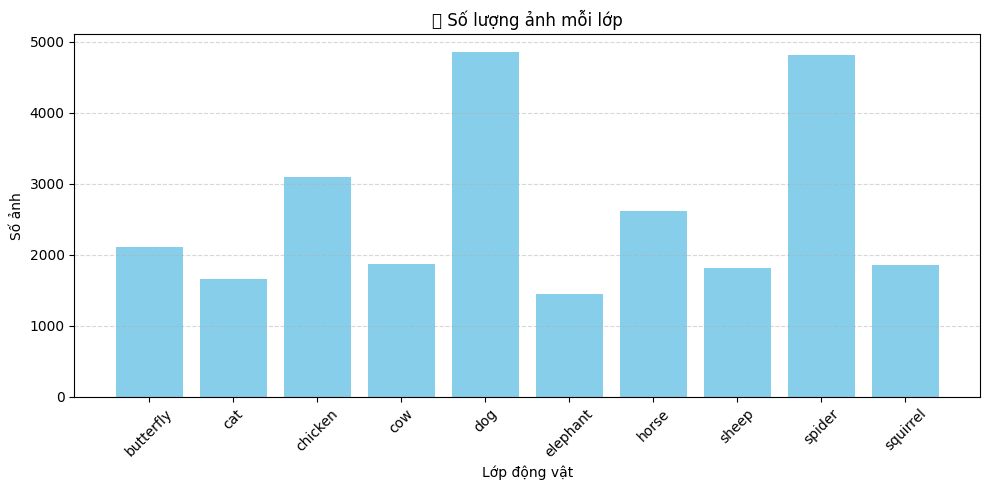

In [3]:
from collections import Counter
label_counts = Counter(dataset.labels)
class_names = [dataset.classes[i] for i in label_counts.keys()]
counts = list(label_counts.values())

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
plt.bar(class_names, counts, color='skyblue')
plt.xlabel("Lớp động vật")
plt.ylabel("Số ảnh")
plt.title("📊 Số lượng ảnh mỗi lớp")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
model = ResNet18(num_classes=len(dataset.classes))
loss_fn = CrossEntropyLoss()

optimizer = SGD(parameters=[], lr=0.01)

In [ ]:
losses = train(model, dataset, loss_fn, optimizer, epochs=1, batch_size=1)

  Batch 1: Loss = 3.6440
  Batch 2: Loss = 4.1708
  Batch 3: Loss = 4.6946
  Batch 4: Loss = 5.2013
  Batch 5: Loss = 5.8741
  Batch 6: Loss = 6.2257


In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Biểu đồ mất mát trong quá trình huấn luyện')
plt.grid(True)
plt.show()